In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = sns.load_dataset('titanic')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
df.head(100)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
97,1,1,male,23.0,0,1,63.3583,C,First,man,True,D,Cherbourg,yes,False
98,1,2,female,34.0,0,1,23.0000,S,Second,woman,False,NaN,Southampton,yes,False


In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.shape

(891, 15)

In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# replace missing value in age column with mean

df['age'] = df['age'].fillna(df['age'].mean())


# replace missing value in categorical column with mode
cols = ['deck', 'embarked', 'embark_town']
df[cols] = df[cols].fillna(df[cols].mode().iloc[0])

In [ ]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [ ]:
df['age'] = df['age'].astype('int64')

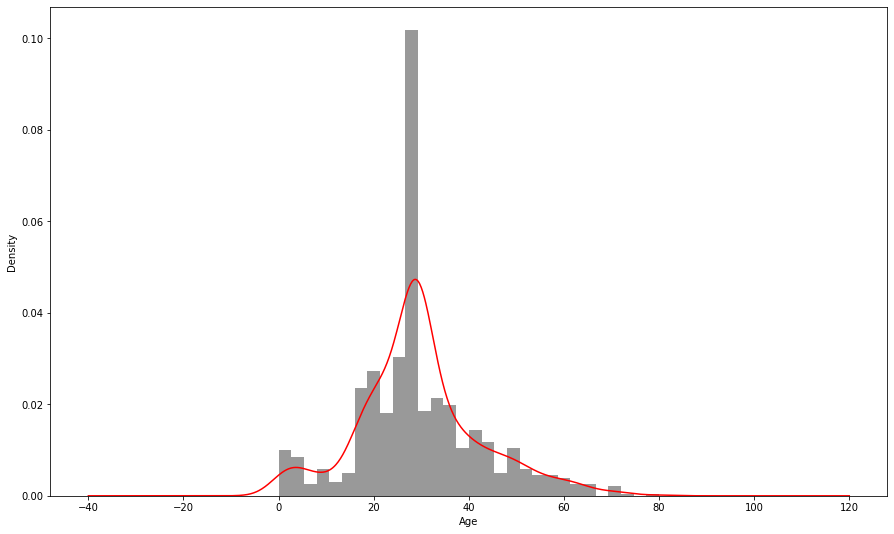

In [ ]:
ax = df['age'].hist(bins = 30, density= True, color = 'gray',alpha = 0.8, figsize = (15, 9))
df['age'].plot(kind = 'density', color = 'red')
ax.set_xlabel('Age')
plt.show()

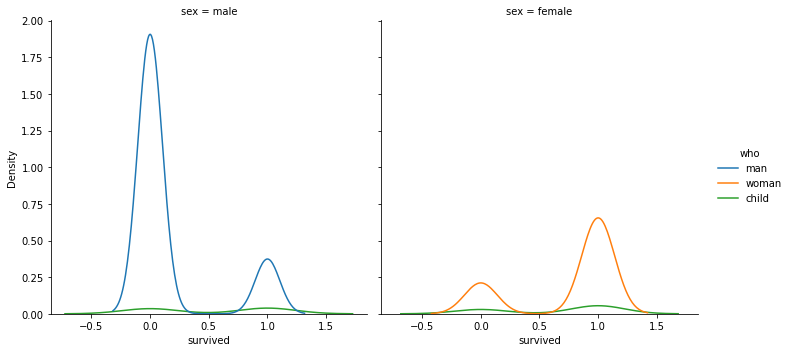

In [ ]:
sns.displot(data = df, x = 'survived', hue = 'who', col = 'sex', kind = 'kde')

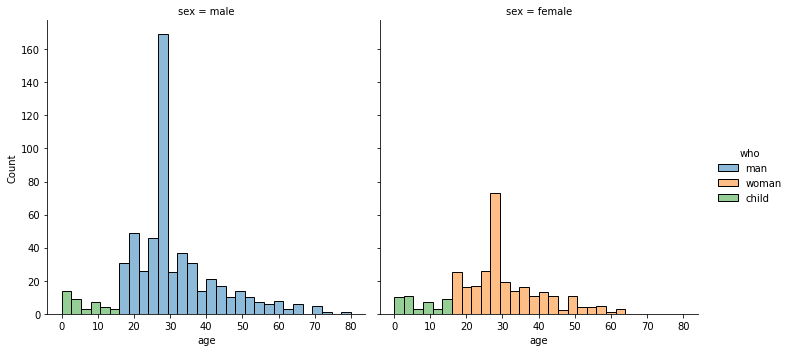

In [ ]:
sns.displot(data = df, x = 'age', hue='who', col='sex')

In [ ]:
df.dtypes

survived          int64
pclass            int64
sex              object
age               int64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

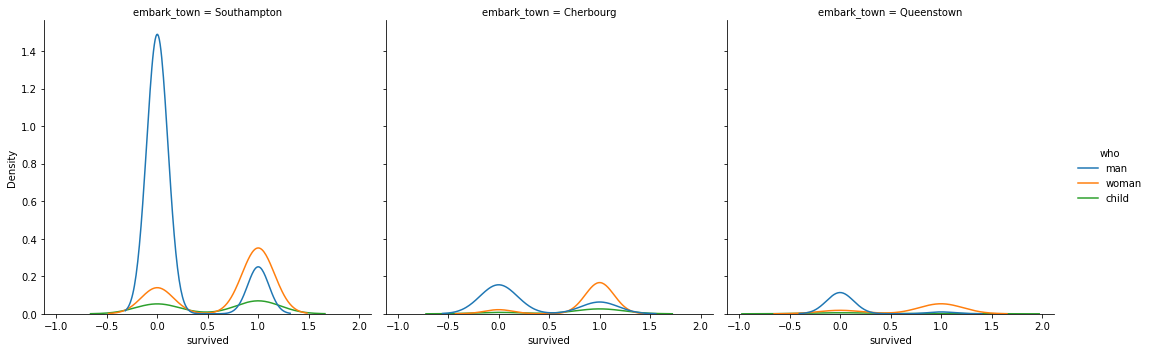

In [ ]:
categorical_column = ['sex', 'embarked','embark_town', 'class', 'who','deck', 'alive']
numerical_column = ['survived','pclass','age','sibsp','parch','fare']

sns.displot(data = df, x = 'survived', hue = 'who', col= 'embark_town', kind = 'kde')

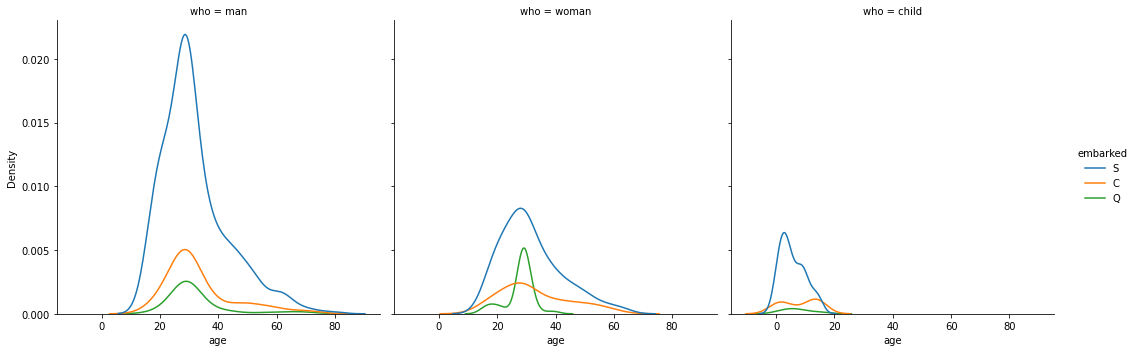

In [ ]:
sns.displot(data =df , x = 'age', hue = 'embarked', col='who', kind = 'kde')

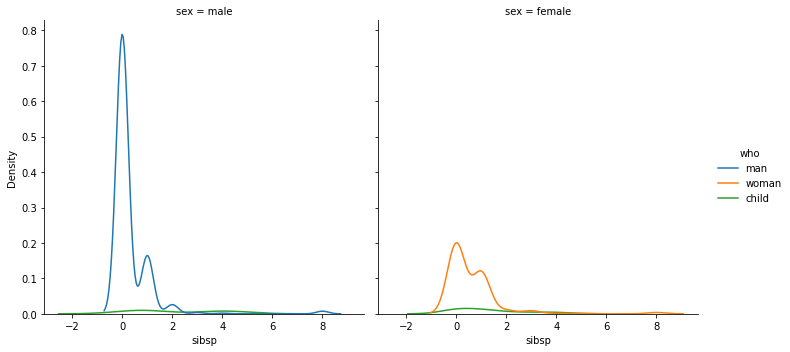

In [ ]:
sns.displot(data = df, x = 'sibsp', hue = 'who', col = 'sex', kind = 'kde')

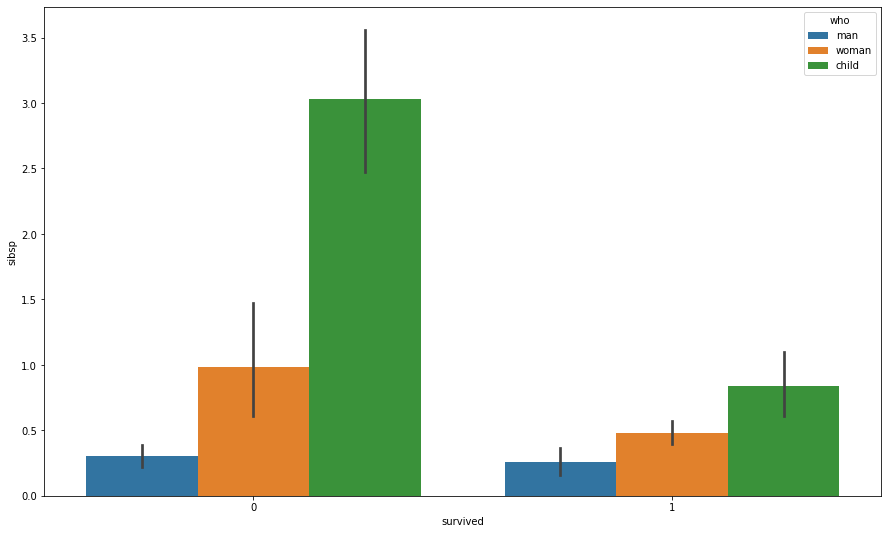

In [ ]:
plt.figure(figsize =(15, 9))
x = sns.barplot(x = 'survived', y = 'sibsp', hue = 'who', data = df)

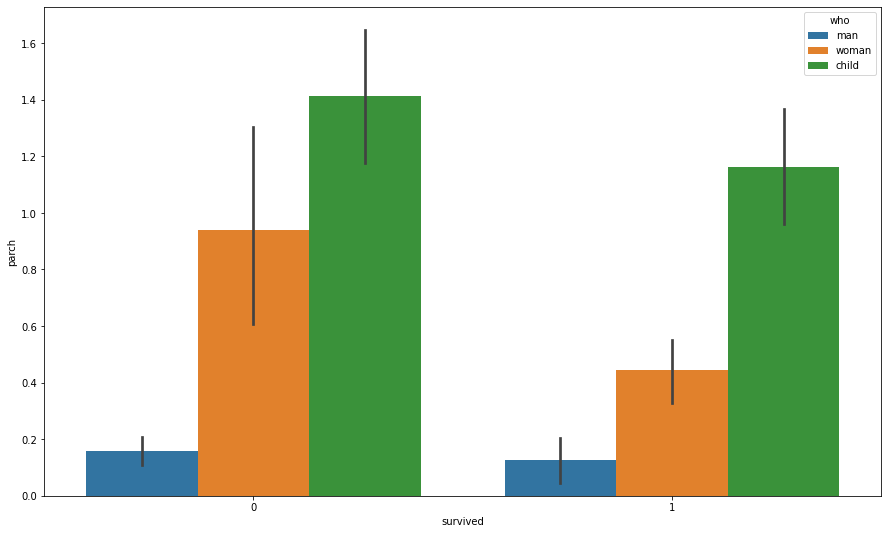

In [ ]:
plt.figure(figsize=(15, 9))
ax = sns.barplot(x = 'survived', y= 'parch', hue= 'who', data = df)

In [ ]:
# label encoder 
# label_encoder = LabelEncoder()
# df[categorical_column] = label_encoder.fit_transform(df[categorical_column])
# label_encoder = {}

# label_encoder['sex'] = LabelEncoder()
# label_encoder['embarked'] = LabelEncoder()
# label_encoder['embark_town'] = LabelEncoder()
# label_encoder['class'] = LabelEncoder()
# label_encoder['who'] = LabelEncoder()
# # label_encoder['alive'] = LabelEncoder()

# for le in label_encoder:
# label_encoder[le].fit_transform()

label_encoder = LabelEncoder()

df['sex'] = label_encoder.fit_transform(df['sex'])
df['embarked'] = label_encoder.fit_transform(df['embarked'])
df['class'] = label_encoder.fit_transform(df['class'])
df['embark_town'] = label_encoder.fit_transform(df['embark_town'])
df['who'] = label_encoder.fit_transform(df['who'])
df['alive'] = label_encoder.fit_transform(df['alive'])
df['deck'] = label_encoder.fit_transform(df['deck'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

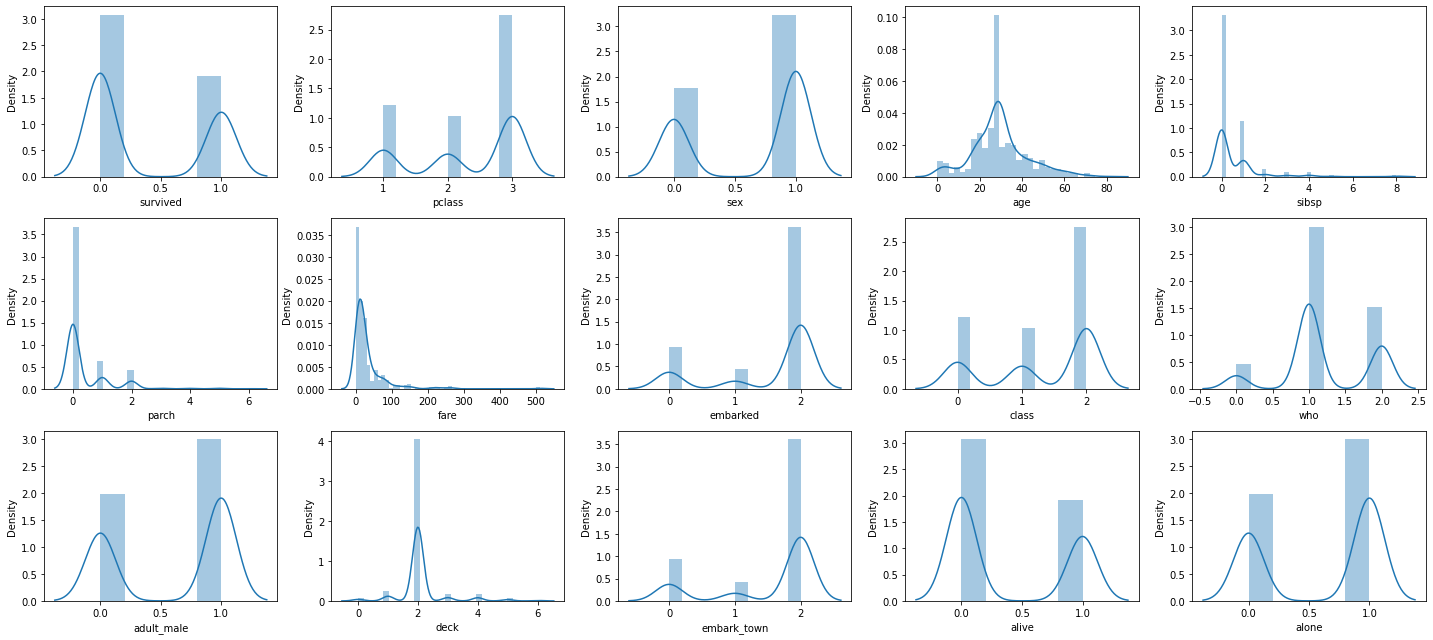

In [ ]:
rows = 3
cols = 5

f, ax = plt.subplots(nrows= rows, ncols=cols, figsize=(20, 9))

col = df.columns

index = 0

for i in range(rows):
  for k in range(cols):
    sns.distplot(df[col[index]], ax = ax[i][k])
    index = index + 1

plt.tight_layout()

In [ ]:
df = df.astype({
    'adult_male':'int64',
    'alone':'int64',
    #'fare':'int64'
})

df.dtypes

survived         int64
pclass           int64
sex              int64
age              int64
sibsp            int64
parch            int64
fare           float64
embarked         int64
class            int64
who              int64
adult_male       int64
deck             int64
embark_town      int64
alive            int64
alone            int64
dtype: object

In [ ]:
X = df.drop(['survived'], axis = 1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify= y)

print(X)
print(y)
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of y_test:', y_test.shape)

     pclass  sex  age  sibsp  parch     fare  embarked  class  who  \
0         3    1   22      1      0   7.2500         2      2    1   
1         1    0   38      1      0  71.2833         0      0    2   
2         3    0   26      0      0   7.9250         2      2    2   
3         1    0   35      1      0  53.1000         2      0    2   
4         3    1   35      0      0   8.0500         2      2    1   
..      ...  ...  ...    ...    ...      ...       ...    ...  ...   
886       2    1   27      0      0  13.0000         2      1    1   
887       1    0   19      0      0  30.0000         2      0    2   
888       3    0   29      1      2  23.4500         2      2    2   
889       1    1   26      0      0  30.0000         0      0    1   
890       3    1   32      0      0   7.7500         1      2    1   

     adult_male  deck  embark_town  alive  alone  
0             1     2            2      0      0  
1             0     2            0      1      0  
2     

In [ ]:
min_max_scaler = MinMaxScaler()

X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)


In [ ]:
def models(X_train, y_train):
  #1 Logitic Regression 
  logistic = LogisticRegression()
  logistic.fit(X_train, y_train)

  #2 SGDClassifier
  sgdc= SGDClassifier()
  sgdc.fit(X_train, y_train)

  #3 KNeighbors Classifier
  neighbors = KNeighborsClassifier()
  neighbors.fit(X_train, y_train)

  #4 svc
  svc = SVC(kernel = 'rbf')
  svc.fit(X_train, y_train)

  #3 RandomForest
  forest= RandomForestClassifier(random_state=0, criterion = 'entropy', n_estimators=10)
  forest.fit(X_train, y_train)

  #2 DecisionTreeClassifier
  tree= DecisionTreeClassifier(random_state=0, criterion = 'entropy')
  tree.fit(X_train, y_train)

  print('Logistic Regression Accuracy: ', logistic.score(X_train, y_train))
  print('SGD Classifier Accuracy:', sgdc.score(X_train, y_train))
  print('KNeighbors Accuracy:', neighbors.score(X_train, y_train))
  print('SVC:', svc.score(X_train, y_train))
  print('Random Forest Accuracy:', forest.score(X_train, y_train))
  print('Decision Tree Accuracy:', tree.score(X_train, y_train))
  

  return logistic, sgdc, neighbors, svc, forest, tree

In [ ]:
model = models(X_train, y_train)

Logistic Regression Accuracy:  1.0
SGD Classifier Accuracy: 1.0
KNeighbors Accuracy: 0.9957865168539326
SVC: 1.0
Random Forest Accuracy: 1.0
Decision Tree Accuracy: 1.0


In [ ]:
for i in range(len(model)):
  print('Model', i) 
  print('Confusion matrix:', confusion_matrix(y_test, model[i].predict(X_test)))
  print(classification_report(y_test, model[i].predict(X_test))) 

Model 0
Confusion matrix: [[110   0]
 [  0  69]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Model 1
Confusion matrix: [[110   0]
 [  0  69]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        69

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179

Model 2
Confusion matrix: [[110   0]
 [  1  68]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       110
           1       1.00      0.99      0.99        69

    accuracy                       

In [ ]:
models = {}
y_pred = {}


models['Logistic regression'] =LogisticRegression()
models['SGD classifier'] = SGDClassifier()
models['KNeighbors classifier'] = KNeighborsClassifier()
models['SVC'] = SVC(kernel = 'rbf')
models['Random forest classifier'] = RandomForestClassifier()
models['Decision tree classifier'] = DecisionTreeClassifier()

for m in models:
  models[m].fit(X_train, y_train)
  y_pred = models[m].predict(X_test)

In [ ]:
y_train = y_train.reshape(-1,1)
y_pred = y_pred.reshape(-1,1)

In [ ]:
cm = {}
cr = {}

for models in y_pred:
  cm[models] = confusion_matrix(y_test, y_pred[models])
  cl[models] = classification_report(y_test, y_pred[models])

  print('\n{}:'.format(models), cm[models])
  print('\n{}:'.format(models), cl[models])

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = {}
mae = {}
mse = {}

for models in y_pred:

  r2[models] = r2_score(y_test, y_pred[models])
  mae[models] = mean_absolute_error(y_test, y_pred[models]) 
  mse[models] = mean_squared_error(y_test, y_pred[models])

 
  
  print("\n{}:".format(models), r2[models])
  print('mae\n{}:'.format(models), mae[models])
  print("mse\n{}:".format(models), mse[models])

In [ ]:
# categorical_column = ['sex', 'embarked','embark_town', 'class', 'who','deck', 'alive']
# numerical_column = ['survived','pclass','age','sibsp','parch','fare']
# parch, sibsp survived = > %who

labels = ['who']
parch = ['parch']
survived = ['survived']

x = np.arange(len(labels))
width = 0.25

f, ax = plt.subplots()
rects1 = ax.bar(x - width/2, parch, width, label='Parch')
rects2 = ax.bar(x + width/2, survived, width, label='Survived')


ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar(rects1, padding=3)
# ax.bar_label(rects2, padding=3)

f.tight_layout()

plt.show()
